In [1]:
# Step 1: Importing Data Handling, Visualization, and Machine Learning Libraries

import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 

 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

In [2]:
#Importing the data 
df = pd.read_csv("C:/Users/Administrator/Documents/ow/HR_comma_sep.csv")

In [3]:
#checking the first five row of the data
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#“snapshot” of dataset’s structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
#statistical summary of data 
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='left', ylabel='count'>

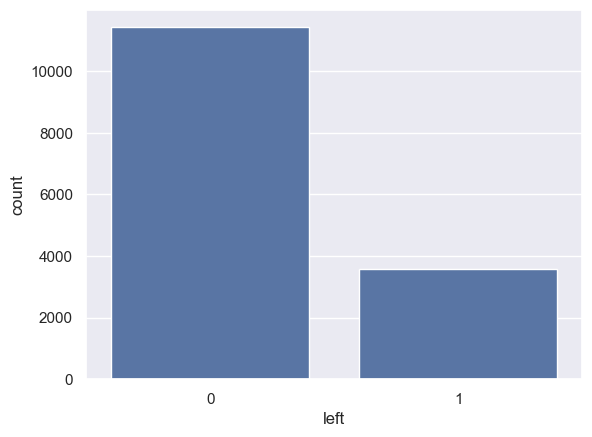

In [7]:
sns.countplot(x = 'left', data = df)

#### The dataset shows class imbalance, with only 24% representing attrition cases.

In [8]:
df.select_dtypes("number").groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<Axes: xlabel='salary'>

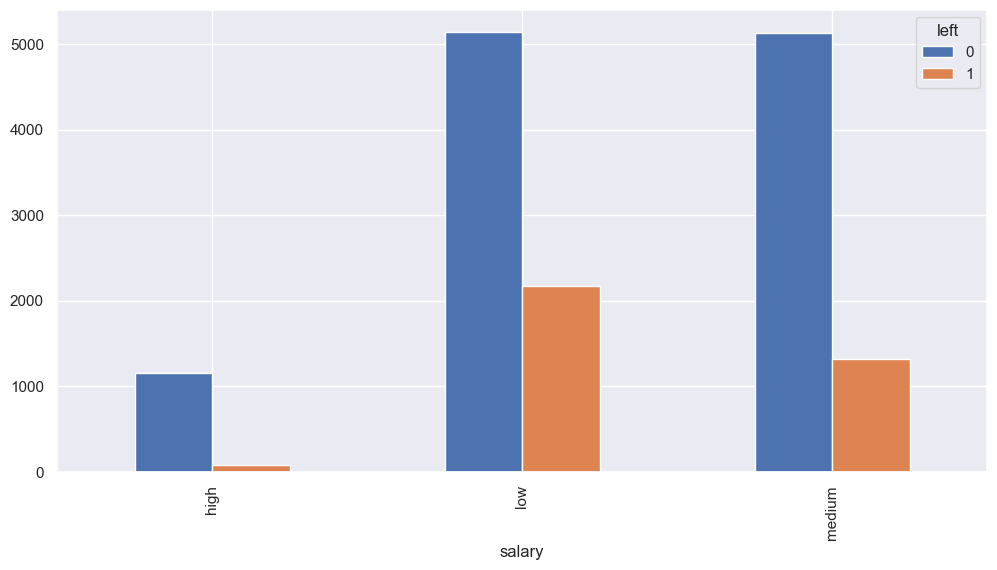

In [9]:
pd.crosstab(df.salary, df.left).plot(kind = "bar", figsize = (12, 6))

#### Employee exits increase as salary level decreases — indicating pay strongly affects retention.

<Axes: xlabel='Department'>

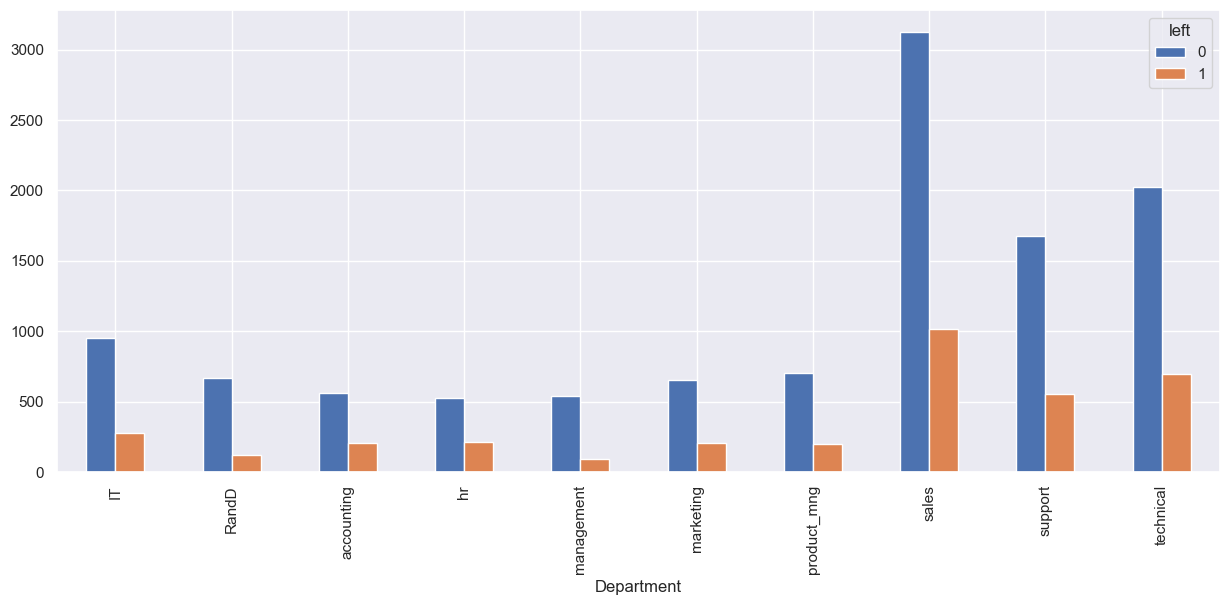

In [10]:
pd.crosstab(df.Department, df.left).plot(kind = "bar", figsize = (15, 6))

#### Turnover is concentrated in customer-facing and technical roles — Sales, Support, and Technical

In [11]:
#converts all categorical (object-type) columns in the DataFrame into dummy (0/1) variables
dummy = pd.get_dummies(df.select_dtypes("object"), prefix = df.select_dtypes("object").columns, drop_first = True)

In [12]:
df1  = pd.concat([df, dummy], axis = 1)

In [13]:
#drop all categorical columns 
df1.drop(columns = ["Department", "salary"], inplace = True)

In [14]:
#Splitting data into dependent and independent variable 
y = df1['left']

X = df1.drop(columns = 'left')

In [15]:
#further Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (10499, 18)
X_test: (4500, 18)
y_train: (10499,)
y_test: (4500,)


In [16]:
#Define the Classifier 
Classifier  = {
    "Classifier_NB": GaussianNB(),
    "Classifier_LR": LogisticRegression(max_iter = 1000),
    "Classifier_RF": RandomForestClassifier(random_state = 0),
    "Classifier_SVM": SVC(gamma = 2, C= 1), 
    "Classifier_DT": DecisionTreeClassifier(max_depth = 2, random_state = 0), 
    "Classifier_KNN": KNeighborsClassifier(n_neighbors = 3)
}

result = {}
print("Number of misplaced point out of %d total points:" %X_test.shape[0])
# Train the classifiers on the training set and test classifiers on unseen test data
for clf_name, clf_model in Classifier.items():
    clf_model.fit(X_train, y_train)
    clf_model.predict(X_test)
    print(clf_name + ": %d" %(y_test != clf_model.predict(X_test)).sum())
    result[clf_name] = clf_model.predict(X_test)

Number of misplaced point out of 4500 total points:
Classifier_NB: 1294
Classifier_LR: 932
Classifier_RF: 41
Classifier_SVM: 315
Classifier_DT: 647
Classifier_KNN: 269


#### Random Forest (41) performed the best — it made the fewest errors, showing high accuracy and strong generalization.

In [17]:
print("Accuracy Score:")
for clf_name, clf_model in result.items():
    print(clf_name + ": ", round(metrics.accuracy_score(y_test, clf_model)*100,4))

print("\nPrecision Scores:")
for clf_name, clf_model in result.items():
        print(clf_name + ": ", round(metrics.precision_score(y_test, clf_model, average = 'weighted') * 100,4))

print("\nRecall Scores:")
for clf_name, clf_model in result.items():
    print(clf_name + ": ", round(metrics.recall_score(y_test, clf_model, average = "weighted")*100,4))

print("\nF₁ Scores:")
for clf_name, clf_model in result.items():
        print(clf_name + ": ", 
              round(metrics.f1_score(y_test, clf_model, average = 'weighted', labels = np.unique(clf_model)) * 100, 4)
             )
        
print("\nF₂ Scores:")
for clf_name, clf_model in result.items():
        print(clf_name + ": ", 
              round(metrics.fbeta_score(y_test, clf_model, average = 'weighted', beta = 0.5) * 100,4)
             )

Accuracy Score:
Classifier_NB:  71.2444
Classifier_LR:  79.2889
Classifier_RF:  99.0889
Classifier_SVM:  93.0
Classifier_DT:  85.6222
Classifier_KNN:  94.0222

Precision Scores:
Classifier_NB:  80.2381
Classifier_LR:  77.0823
Classifier_RF:  99.0907
Classifier_SVM:  93.362
Classifier_DT:  86.1044
Classifier_KNN:  94.4

Recall Scores:
Classifier_NB:  71.2444
Classifier_LR:  79.2889
Classifier_RF:  99.0889
Classifier_SVM:  93.0
Classifier_DT:  85.6222
Classifier_KNN:  94.0222

F₁ Scores:
Classifier_NB:  73.3518
Classifier_LR:  77.1394
Classifier_RF:  99.0848
Classifier_SVM:  92.5988
Classifier_DT:  83.695
Classifier_KNN:  94.1294

F₂ Scores:
Classifier_NB:  76.95
Classifier_LR:  76.7615
Classifier_RF:  99.0871
Classifier_SVM:  92.8881
Classifier_DT:  84.334
Classifier_KNN:  94.2732


#### Across all models, Random Forest stands out as the best performer, while Naive Bayes is the weakest. The other models (SVM, KNN, Logistic Regression, Decision Tree) perform fairly well but not as perfectly balanced.

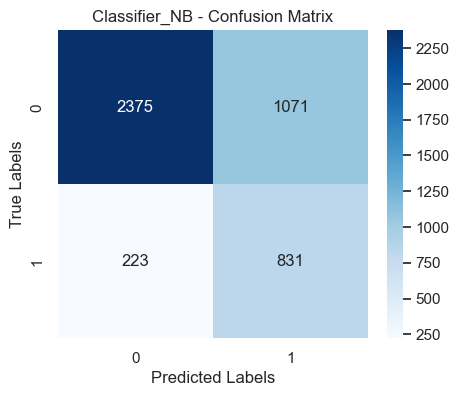


Classifier_NB - Classification Report
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      3446
           1       0.44      0.79      0.56      1054

    accuracy                           0.71      4500
   macro avg       0.68      0.74      0.67      4500
weighted avg       0.80      0.71      0.73      4500



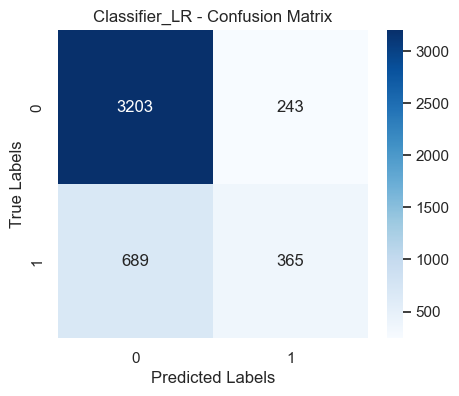


Classifier_LR - Classification Report
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      3446
           1       0.60      0.35      0.44      1054

    accuracy                           0.79      4500
   macro avg       0.71      0.64      0.66      4500
weighted avg       0.77      0.79      0.77      4500



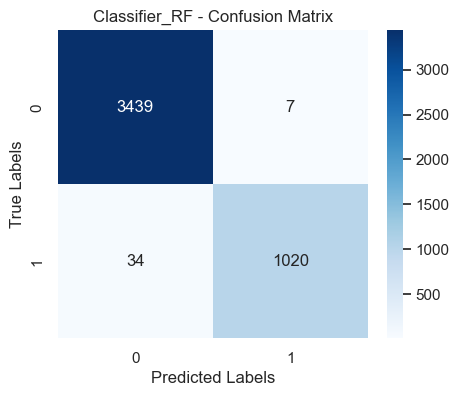


Classifier_RF - Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3446
           1       0.99      0.97      0.98      1054

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



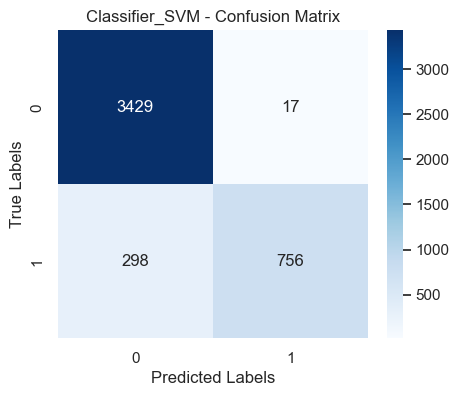


Classifier_SVM - Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3446
           1       0.98      0.72      0.83      1054

    accuracy                           0.93      4500
   macro avg       0.95      0.86      0.89      4500
weighted avg       0.93      0.93      0.93      4500



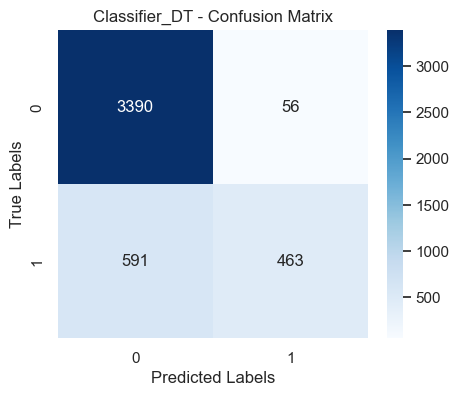


Classifier_DT - Classification Report
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      3446
           1       0.89      0.44      0.59      1054

    accuracy                           0.86      4500
   macro avg       0.87      0.71      0.75      4500
weighted avg       0.86      0.86      0.84      4500



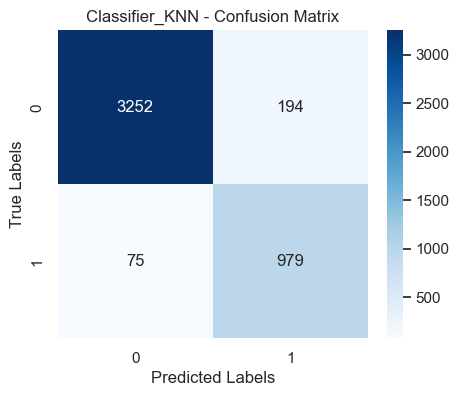


Classifier_KNN - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3446
           1       0.83      0.93      0.88      1054

    accuracy                           0.94      4500
   macro avg       0.91      0.94      0.92      4500
weighted avg       0.94      0.94      0.94      4500



In [18]:
# Import librariess
from sklearn.metrics import confusion_matrix, classification_report

# Loop through each classifier and visualize results
for clf_name, clf_model in Classifier.items():
    y_pred = clf_model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create confusion matrix heatmap
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{clf_name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    # Print classification report
    print(f'\n{clf_name} - Classification Report')
    print(classification_report(y_test, y_pred))


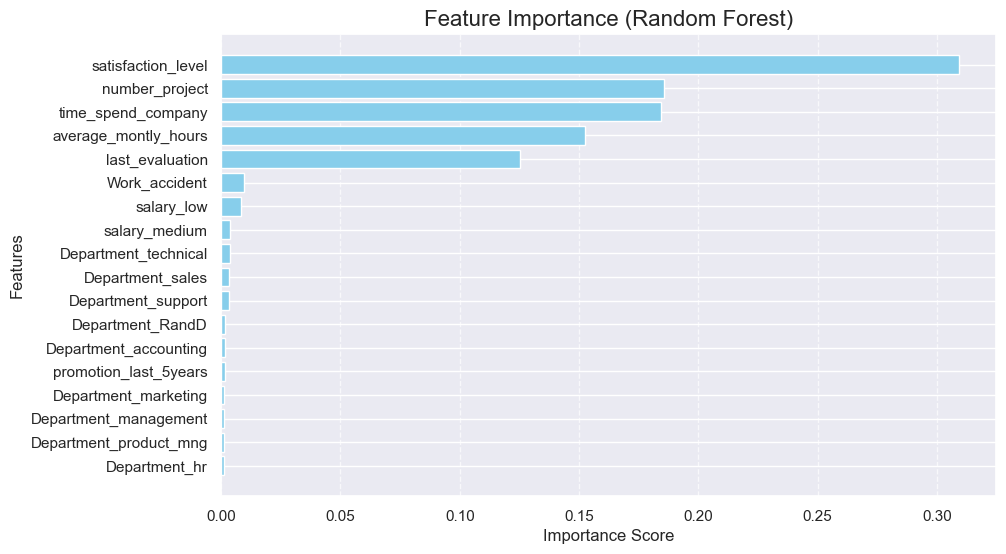

In [19]:
# Define your feature names
feature_names = X_train.columns

# Get the trained Random Forest model
rf_model = Classifier["Classifier_RF"]
rf_model.fit(X_train, y_train)

# Get feature importance values
importances = rf_model.feature_importances_

# Create DataFrame for visualization
feat_imp_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp_rf['Feature'], feat_imp_rf['Importance'], color='skyblue')
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.gca().invert_yaxis()  # most important feature at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

